In [1]:
import pandas as pd
import datetime


In [2]:
def getdate(time):
    return time.split("T")[0]
def getmonth(date):
    return date.strftime("%B")

In [3]:
#Reading EY Data 
ey=pd.read_csv("Events/EY_COVID.csv")
ey["Date"]=ey["Time"].apply(getdate)
ey["Date"]=ey["Date"].astype('datetime64[ns]')
ey['Month']=ey["Date"].apply(getmonth)
ey=ey.groupby("Month").count()["Text"].to_frame()
ey.rename(columns={"Text":"EY"},inplace=True)

In [4]:
#Reading KPMG Data 
KPMG=pd.read_csv("Events/KPMG_COVID.csv")
KPMG["Date"]=KPMG["Time"].apply(getdate)
KPMG["Date"]=KPMG["Date"].astype('datetime64[ns]')
KPMG['Month']=KPMG["Date"].apply(getmonth)
KPMG=KPMG.groupby("Month").count()["Text"].to_frame()
KPMG.rename(columns={"Text":"KPMG"},inplace=True)

In [5]:
#Reading PWC Data 
PWC=pd.read_csv("Events/PWC_COVID.csv")
PWC["Date"]=PWC["Time"].apply(getdate)
PWC["Date"]=PWC["Date"].astype('datetime64[ns]')
PWC['Month']=PWC["Date"].apply(getmonth)
PWC=PWC.groupby("Month").count()["Text"].to_frame()
PWC.rename(columns={"Text":"PWC"},inplace=True)

In [6]:
#Reading Deloitte Data 
Deloitte=pd.read_csv("Events/Deloitte_COVID.csv")
Deloitte["Date"]=Deloitte["Time"].apply(getdate)
Deloitte["Date"]=Deloitte["Date"].astype('datetime64[ns]')
Deloitte['Month']=Deloitte["Date"].apply(getmonth)
Deloitte=Deloitte.groupby("Month").count()["Text"].to_frame()
Deloitte.rename(columns={"Text":"Deloitte"},inplace=True)

In [8]:
#Create table with final Comparision
final_tab=ey.join(Deloitte)
final_tab=KPMG.join(final_tab)
final_tab=PWC.join(final_tab)
final_tab["Month"]=final_tab.index
final_tab=final_tab.reindex(['March','April','May','June','July','August','September','October','November'])

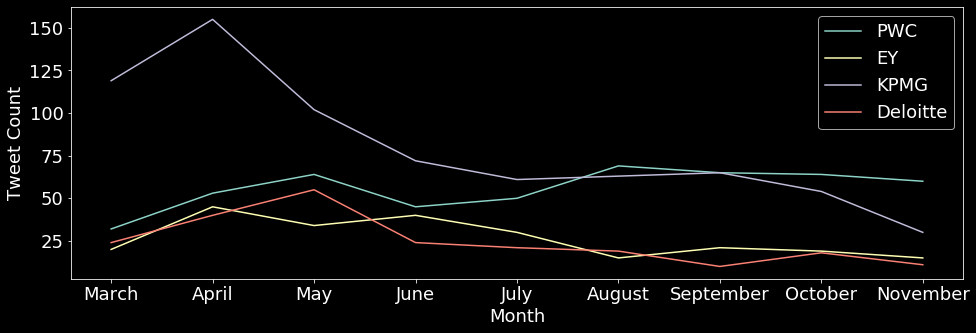

In [9]:
#Plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,5]
plt.rcParams.update({'font.size': 18})
plt.style.use('dark_background')
#plt.style.use('dark_background')

# line 1 points
x1 = final_tab["Month"]
y1 = final_tab["PWC"]
# plotting the line 1 points 
plt.plot(x1, y1, label = "PWC")
# line 2 points
x2 = final_tab["Month"]
y2 = final_tab["EY"]
# plotting the line 2 points 
plt.plot(x2, y2, label = "EY")
# line 2 points
x3 = final_tab["Month"]
y3 = final_tab["KPMG"]
# plotting the line 2 points 
plt.plot(x3, y3, label = "KPMG")
# line 2 points
x4 = final_tab["Month"]
y4 = final_tab["Deloitte"]
# plotting the line 2 points 
plt.plot(x4, y4, label = "Deloitte")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Tweet Count')
# Set a title of the current axes.
#plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.savefig("covid.png")
plt.show()

In [ ]:
'''
Suggestions/Findings
EY Failed to cope up with covid19 and didn't use it as an opportunity to reach out like KPMG
'''